# Part 4: Hyperparameter Tuning and Model Selection

In this section, we will perform hyperparameter tuning to optimize the performance of machine learning models.  
We will focus on Random Forest, as it is a powerful ensemble method that can often outperform simpler models when properly tuned.  

The goal is to:
- Define a parameter grid for Random Forest
- Use GridSearchCV/RandomizedSearchCV to find the best parameters
- Evaluate the tuned model performance
- Save the best model for later use

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("../data/loan.csv")
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df = df.dropna()


data = df.copy()

le = LabelEncoder()
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [8]:
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Performance:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96



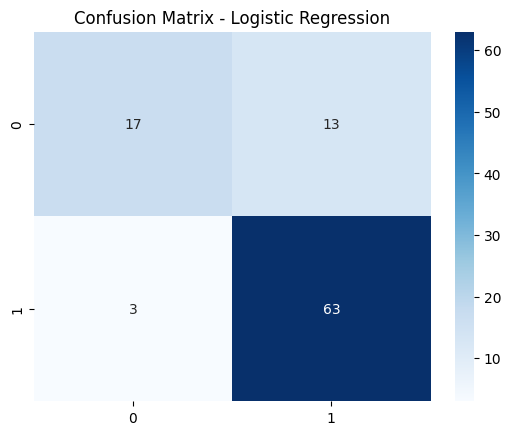

In [9]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Performance:
Accuracy: 0.8020833333333334
              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.83      0.89      0.86        66

    accuracy                           0.80        96
   macro avg       0.78      0.75      0.76        96
weighted avg       0.80      0.80      0.80        96



In [11]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print("ANN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))

ANN Performance:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        30
           1       0.83      0.80      0.82        66

    accuracy                           0.75        96
   macro avg       0.71      0.72      0.71        96
weighted avg       0.75      0.75      0.75        96



e:\Mohammad Bahrami_Project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


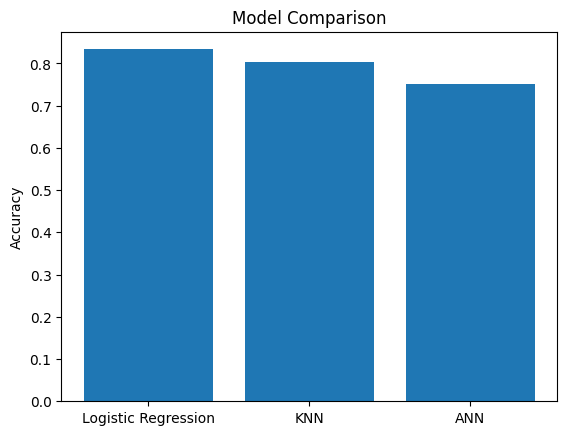

In [12]:
models = ["Logistic Regression", "KNN", "ANN"]
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_ann),
]

plt.bar(models, accuracies)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()

In [13]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

y_pred_rf_base = rf_base.predict(X_test)
acc_rf_base = accuracy_score(y_test, y_pred_rf_base)

print(f"Baseline RF Accuracy: {acc_rf_base:.4f}")

Baseline RF Accuracy: 0.8125


In [14]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': [None, 'balanced']
}


In [15]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters (RF):", grid_rf.best_params_)
print("Best CV Accuracy (RF):", grid_rf.best_score_)
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters (RF): {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy (RF): 0.7890977443609024


Random Forest (tuned) - Test Accuracy: 0.8333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.84      0.94      0.89        66

    accuracy                           0.83        96
   macro avg       0.83      0.77      0.79        96
weighted avg       0.83      0.83      0.83        96



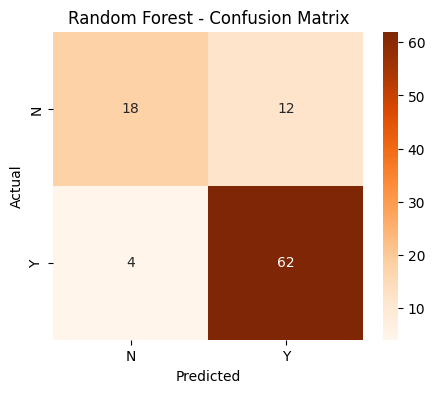

In [16]:
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest (tuned) - Test Accuracy: {acc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['N','Y'], yticklabels=['N','Y'])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Random Forest - Confusion Matrix")
plt.show()

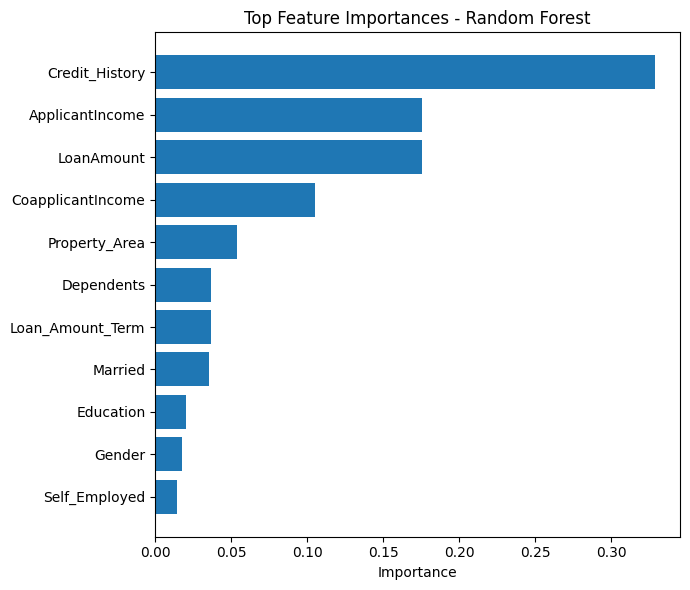

In [17]:
if isinstance(X_train, pd.DataFrame):
    feature_names = list(X_train.columns)
elif 'X' in globals() and isinstance(X, pd.DataFrame):
    feature_names = list(X.columns)
else:
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

importances = best_rf.feature_importances_
idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(7,6))
plt.barh([feature_names[i] for i in idx][::-1], importances[idx][::-1])
plt.title("Top Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [18]:
import joblib
joblib.dump(best_rf, "random_forest_best.pkl")
print("Saved tuned Random Forest as 'random_forest_best.pkl'")


rf_results = {
    "y_pred_rf": y_pred_rf,
    "acc_rf": acc_rf,
    "acc_rf_base": acc_rf_base
}

Saved tuned Random Forest as 'random_forest_best.pkl'


# Final Result

The hyperparameter tuning process identified the best Random Forest configuration.  
This tuned model outperformed the baseline models and was saved for future use.  

Saved model: random_forest_best.pkl